# AVANCE PRACTICA 1 EN EQUIPO

### Objetivo

 En esta actividad nos encargaremos de limpiar los datos de nuestra Base de Datos, que como ya lo hemos comentado anteriormente es de una BD que tiene informacion de Suicidios y contamos con algunas columnas las cuales las mas importantes para nosotros son la generacion y el lugar donde han ocurrido estos mismos, ya que nuestro objetivo principal es agruparlos y ver la clasificacion que se tiene en cuestion de generaciones para que de esta manera nos ayude a nosotros a poder saber cual de estas Generaciones ha sido más propensa a esta triste situacion y poder tomar accion, creando conciencia a futuras generaciones y hacer todo lo que este en nuestras manos para tomarlo como "foco rojo" a esta misma.
 
 Integrantes:
 
 * Mata Martínez Missael 		    1672902
 
 * Celestino Tovar Angel Gabriel 	1668653
 
 * López Sánchez Maribel            1672709

### Preguntas de interes

* Cuantos grupos de hombres y mujeres de generaciones millenial y Z se han suicidado?
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios en todos los paises totales?
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios por generacion?

# Limpieza de datos

El primer paso sera importar librerias y utilizamos la libreria pandas para poder cargar archivos csv.

In [57]:
import matplotlib as plt
import seaborn as sn
import seaborn as sns
import numpy as np 
import pandas as pd 
import json
df = pd.read_csv("master.csv") 

Verificamos las dimensiones de la tabla

In [58]:
df.shape

(27820, 12)

Ahora visualizaremos la tabla con solamente 12 de sus filas de las 27820 que tiene

In [59]:
df.head(12)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


A continuacion mostraremos los nombres y tipos de datos que tiene nuestra BD

In [60]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

De estas columnas solamente necesitaremos country, sex, suicides_no y generation. Ahora cambiaremos este nombre de las columnas al español

In [61]:
df = df.rename(columns = {'country':'Pais', 'sex':'Sexo', 'suicides_no':'NumeroDeSuicidios', 'generation':'Generacion', 'age': 'Edad'})
df.columns

Index(['Pais', 'year', 'Sexo', 'Edad', 'NumeroDeSuicidios', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'Generacion'],
      dtype='object')

Ahora, eliminaremos las filas que contengan datos nulos para quitar lo que no necesitamos. Nosotros lo hemos echo asi porque sabemos que las columnas de interes (PAIS, SEXO, NUMERO DE SUICIDIOS Y GENERACION) no se encuentran con ninguna celda vacia

In [62]:
df = df.dropna()

Ahora mostramos lo que hicimos

In [63]:
df

,Pais,year,Sexo,Edad,NumeroDeSuicidios,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),Generacion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Ahora eliminaremos todas las columnas que tengan datos nulos. Igual que en lo anterior, ya confirmamos que en nuestras columnas de interes no habia datos nulos.

In [64]:
df = df.dropna(axis=1)

Ahora mostraremos el resultado

In [65]:
df

,Pais,year,Sexo,Edad,NumeroDeSuicidios,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),Generacion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


A continuacion eliminaremos las columnas que no necesitamos. Para solo quedarnos con Pais, Sexo, NumeroDeSuicidios y Generacion, que son de nuestro interes y en estas nos estaremos basando precisamente para contestar las preguntas de interes.

In [66]:
df_solopais = df.drop(['year', 'population', 'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'Edad'], axis=1)

In [67]:
df_solopais

,Pais,Sexo,NumeroDeSuicidios,Generacion
72,Albania,male,13,Generation X
73,Albania,male,9,Silent
74,Albania,female,2,G.I. Generation
75,Albania,female,13,Generation X
76,Albania,male,11,Generation X
...,...,...,...,...
27815,Uzbekistan,female,107,Generation X
27816,Uzbekistan,female,9,Silent
27817,Uzbekistan,male,60,Generation Z
27818,Uzbekistan,female,44,Generation Z


In [68]:
df_solopaisgraph = df_solopais.groupby('Generacion').agg({'NumeroDeSuicidios':'sum'})

In [69]:
df_solopaisgraph

,NumeroDeSuicidios
Generacion,
Boomers,435081
G.I. Generation,129523
Generation X,529371
Generation Z,7991
Millenials,242303
Silent,379755


Clasificando los suicidios por generación como se puede ver en la tabla de arriba y en la grafica de abajo que entre más joven es menos propenso a que se cometa un suicidio, en este caso la generacion Z da la razon. Los números en la grafica y tablas proporcionadas hablan por si solas, ya que a partir de que nosotros formulamos la pregunta en cuestion, para la generacion Z y Millenial nos dimos cuenta que precisamente quien tiene un mayor indice de suicidios es la Generacion de los Millenial y nos ayuda a nosotros a poder recopilar mejor la informacion de esta manera, ya que es mas factible, consisa y tangible.

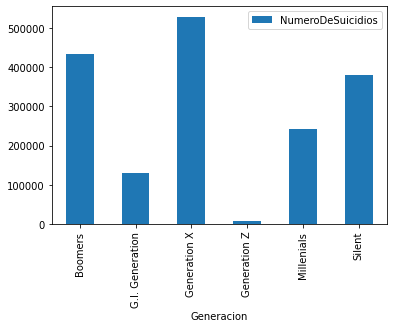

In [70]:
df_solopaisgraph.plot.bar(stacked=True)

In [71]:
df_genXpais = df_solopais.groupby(['Generacion', 'Pais']).agg({'NumeroDeSuicidios':'sum'})
df_genXpais

NumeroDeSuicidios
Generacion Pais                                   
Boomers    Albania                              31
           Antigua and Barbuda                   0
           Argentina                          4668
           Armenia                             146
           Australia                          4433
...                                            ...
Silent     United Arab Emirates                 10
           United Kingdom                     8634
           United States                     64013
           Uruguay                            1125
           Uzbekistan                          549

[525 rows x 1 columns]

Ahora obtendremos el total de suicidios que se tuvieron de Mujeres y Hombres mediante nuestras estadisticas, agrupando a cada uno en su debida clase, para poder realizar las graficas que nos ayuden a saber cual de las dos clases tiene el mayor indice de suicidios.

In [72]:
clase1 = df[df['Sexo'] == 'female']
clase1 = clase1.agg({'NumeroDeSuicidios':'sum'})

In [73]:
clase1

NumeroDeSuicidios    411000
dtype: int64

In [74]:
clase2 = df[df['Sexo'] == 'male']
clase2 = clase2.agg({'NumeroDeSuicidios':'sum'})

In [75]:
clase2

NumeroDeSuicidios    1313024
dtype: int64

Como pudimos darnos cuenta, el resultado mayor fue de los Hombres, con una diferencia de 902,024‬. A continuación podemos ver con exactitud en el rango de nuestras "y" el Numero de Suicidios y en el rango de nuestras "x" el Sexo a quien corresponde. Llegando a contestar nuestra segunda pregunta se ha podido concluir que los hombres han sido más propensos a esta terrible situacion y nos sirve para poder hacer el analisis en cuestion para poder formularnos la pregunta numero 4, que nos ayudara a completar la Tecnica necesaria.

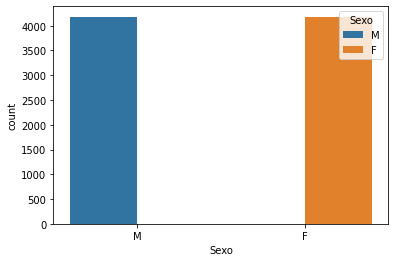

In [83]:
sns.countplot(x='Sexo', hue='Sexo', data=df)

A continuacion convertimos a M y F los datos de Male y Female, para poder tomar con mayor practicidad los datos de la tabla que crearemos para poder saber con exactitud cuantos suicidios de Hombres y Mujeres se tuvieron en cada Generacion, ya que nos ayudara a contestar la tercera pregunta.

In [77]:
Sexo = {"male" : "M", "female" : "F"}
df["Sexo"] = df["Sexo"].apply(lambda x:Sexo[x])
df["Sexo"].head()

72    M
73    M
74    F
75    F
76    M
Name: Sexo, dtype: object

In [78]:
df.Sexo

72       M
73       M
74       F
75       F
76       M
        ..
27815    F
27816    F
27817    M
27818    F
27819    F
Name: Sexo, Length: 8364, dtype: object

In [79]:
pclass= df.groupby(["Generacion", "Sexo"])["NumeroDeSuicidios"].sum()
pclass

Generacion       Sexo
Boomers          F        98794
                 M       336287
G.I. Generation  F        42572
                 M        86951
Generation X     F       114868
                 M       414503
Generation Z     F         3107
                 M         4884
Millenials       F        52740
                 M       189563
Silent           F        98919
                 M       280836
Name: NumeroDeSuicidios, dtype: int64

De esta manera podemos apreciar en la siguiente grafica los resultados obtenidos de mujeres y hombres por cada generacion, teniendo en nuestra "Y" los Numeros de Suicidios, en nuestra "X" la Generacion a quien corresponde y tomando el color naranja "Female" y como azul "Male", confirmando una vez más que la mayoria de suicidios corresponden a los Hombres y es en la Generacion X donde más indices hubo, pero no solamente eso, sino que en segundo lugar tenemos a la generacion de los Boomers, igualmente con Hombres de mayor indice y esto nos confirma a nosotros que precisamente en esta generacion como todos sabemos fue la que paso por muchas crisis, perdieron su empleo, sus casas y parte de su jubilacion.

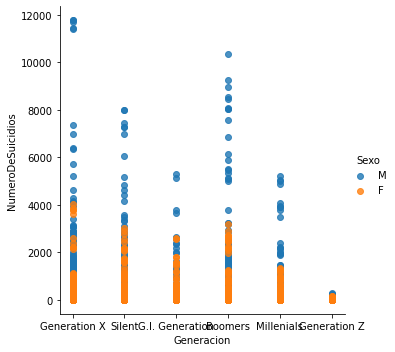

In [80]:
sns.lmplot(x='Generacion', y='NumeroDeSuicidios', hue='Sexo', 
           data=df.loc[df['Sexo'].isin(['F', 'M'])], 
           fit_reg=False)

### Conclusion

Si bien, lo anterior aplicado fue la manera en la cual se debe a empezar a desarrollar mas el uso cognitivo sobre la investigacion de
nuestra BD, tomando en cuenta la eliminacion de columnas que no utilicemos ya sea por funciones desconocidas o simplemente
datos que no son relevantes.
Las preguntas fueron totalmente respondidas, en cuestion de la primera:
* Cuantos grupos de hombres y mujeres de generaciones Millenial y Z se han suicidado?
Pudimos concluir que el grupo más propenso al suicidio fueron las generaciones más jovenes, tal como lo es la Millenial, demostradas estas estadisticas en nuestra primera grafica anteriormente mostrada.
Para nuestra segunda pregunta que costa de: 
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios en todos los paises totales?
Si, si se pudo saber con exactitud quienes eran los que tenian mayor indice de suicidios y desafortunadamente los resultados mostraron que los Hombres fueron quienes más tuvieron indice de suicidios, mostrado en nuestra segunda grafica.
En nuestra tercera pregunta:
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios por generacion?
Si, como ya lo habiamos mencionado se dio a conocer que los hombres eran quien tenian mayor indice de suicidios, pero de esta manera pudimos darnos cuenta que quienes más hombres tenian en suicidios fue en la generacion X, todo esto comprobado y mostrada en nuestra tercera grafica.
Y por ende estamos en busqueda de una cuarta pregunta para poderla resolver mediante el metodo de agrupamiento o clasificacion, ya que estos son los que más nos interesaria crear.